In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, index_col = 0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver = 'liblinear', random_state = 13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [5]:
accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred_test)

(0.7429286126611506, 0.7446153846153846)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver = 'liblinear', random_state = 13))
]

pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [7]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred_test)

(0.7444679622859341, 0.7469230769230769)

In [8]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [9]:
models = {
    'logistic regression' : lr,
    'decision tree' : wine_tree
}

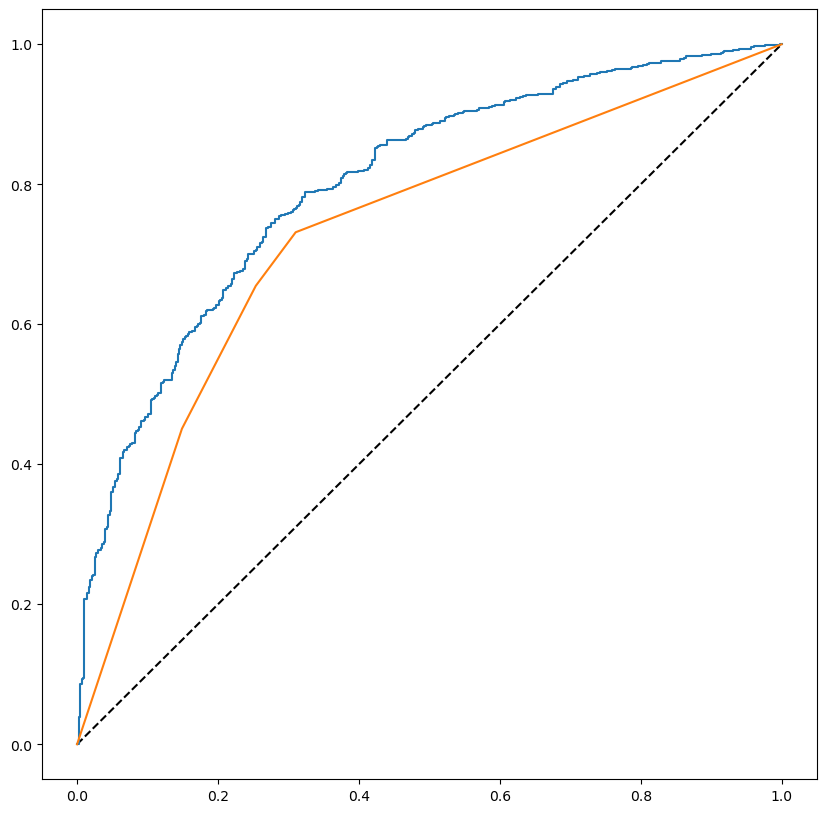

In [10]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name, model in models.items():
    pred = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, pred[:, 1])
    plt.plot(fpr, tpr, label = model_name)

plt.show()

In [11]:
PIMA_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/diabetes.csv'

PIMA = pd.read_csv(PIMA_url)
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [14]:
(PIMA == 0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [16]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())
(PIMA[zero_features] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
BMI              0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X = PIMA.drop('Outcome', axis = 1)
y = PIMA['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13, stratify = y)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver = 'liblinear', random_state = 13))
]

In [19]:
pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

print('accuracy : {:.2f}'.format(accuracy_score(y_test, pred)))
print('precision : {:.2f}'.format(precision_score(y_test, pred)))
print('recall : {:.2f}'.format(recall_score(y_test, pred)))
print('F1 score : {:.2f}'.format(f1_score(y_test, pred)))
print(confusion_matrix(y_test, pred))

accuracy : 0.77
precision : 0.70
recall : 0.61
F1 score : 0.65
[[86 14]
 [21 33]]


In [23]:
coeff = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)

<Axes: ylabel='Features'>

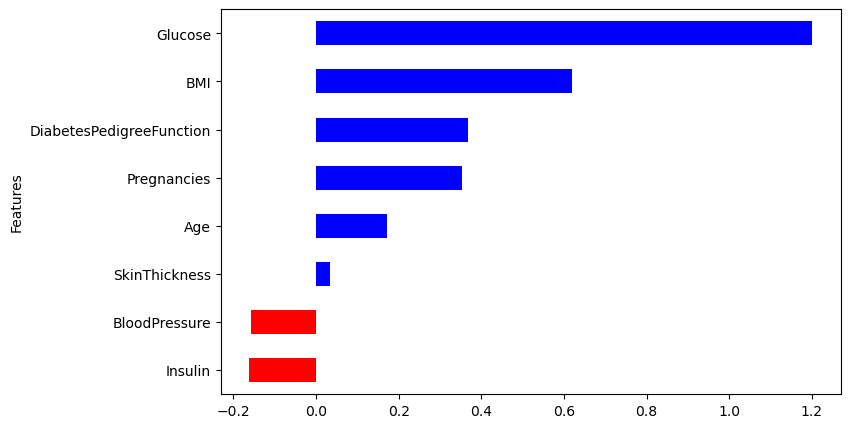

In [24]:
features = pd.DataFrame({'Features' : labels, 'Importance' : coeff})
features.sort_values(by = ['Importance'], ascending = True, inplace = True)
features['Positive'] = features['Importance'] > 0

features.set_index('Features', inplace = True)

features['Importance'].plot(kind = 'barh', figsize = (8, 5), color = features['Positive'].map({True : 'blue', False : 'red'}))